# California price house regression using an artificial neural network
This analysis tries to predict the prices of different houses in California dataset usin an artificial neural network

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
import matplotlib.pyplot as plt

## Importing dataset

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [7]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

From the last information, we can verify there are 20640 instances, 8 numeric, predictive attributes and the target

## Splitting and standardizing Data

In [13]:
from sklearn.model_selection import train_test_split
x_train_full, x_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state = 42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, random_state = 42)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_valid = scaler.transform(x_valid)

In [17]:
x_train.shape

(11610, 8)

## Creating and compiling model

In [26]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape = x_train.shape[1:]), #Input size 8 and first layer size:30
    keras.layers.Dense(30, activation = "relu"), #Second layer size: 30
    keras.layers.Dense(1) #Output size: 1
]) #Initializing model

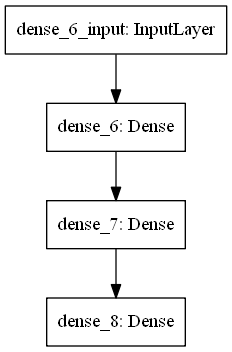

In [27]:
keras.utils.plot_model(model)

In [28]:
model.compile(loss = "mean_squared_error",
             optimizer = keras.optimizers.SGD(lr = 1e-3),
             metrics = ["mae"])

In [35]:
model_history = model.fit(x_train, y_train, epochs = 20, validation_data = (x_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3894 - mae: 0.4483 - val_loss: 0.4536 - val_mae: 0.4408
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3872 - mae: 0.4463 - val_loss: 0.4892 - val_mae: 0.4452
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3853 - mae: 0.4457 - val_loss: 0.4742 - val_mae: 0.4389
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3830 - mae: 0.4437 - val_loss: 0.4667 - val_mae: 0.4423
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3816 - mae: 0.4426 - val_loss: 0.4323 - val_mae: 0.4363
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3794 - mae: 0.4416 - val_loss: 0.4517 - val_mae: 0.4361
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3781 - mae: 0.4403 - val_loss: 0.4450 - val_mae: 0.4354
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.

## Model performance

In [36]:
mae_test = model.evaluate(x_test, y_test)

162/162 [==============================] - 0s 917us/step - loss: 0.3630 - mae: 0.4307


In [37]:
model_history.history

{'loss': [0.3893730938434601,
  0.38719499111175537,
  0.3852682411670685,
  0.3830026090145111,
  0.38159120082855225,
  0.37943801283836365,
  0.37812933325767517,
  0.3764858841896057,
  0.3749067485332489,
  0.3733694851398468,
  0.37244099378585815,
  0.3709791898727417,
  0.3698503375053406,
  0.3686806559562683,
  0.36762362718582153,
  0.3665948808193207,
  0.3652607500553131,
  0.3647005558013916,
  0.36319971084594727,
  0.36240020394325256],
 'mae': [0.4482833743095398,
  0.44631659984588623,
  0.44572460651397705,
  0.4437309205532074,
  0.4426022171974182,
  0.44158807396888733,
  0.4403378665447235,
  0.4392853081226349,
  0.43872252106666565,
  0.43780308961868286,
  0.43629753589630127,
  0.4357509911060333,
  0.43475717306137085,
  0.43383893370628357,
  0.4334556460380554,
  0.4328222870826721,
  0.43188223242759705,
  0.4311762750148773,
  0.4300403594970703,
  0.4295453429222107],
 'val_loss': [0.4536118507385254,
  0.48916515707969666,
  0.4741799533367157,
  0.466

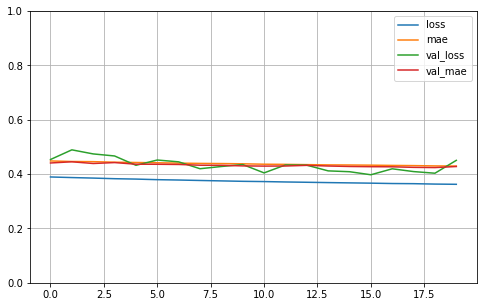

In [39]:
pd.DataFrame(model_history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Predicting values

In [40]:
x_new = x_test[:3]
y_pred = model.predict(x_new)
print(y_pred)
print(y_test[:3])

[[0.81855047]
 [1.871609  ]
 [4.19729   ]]
[0.477   0.458   5.00001]


In [41]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, model.predict(x_test))

0.3630181891006057

## Functional API

In [42]:
del model
keras.backend.clear_session()

In [45]:
input_ = keras.layers.Input(shape = x_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation = "relu")(input_)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs = [input_], outputs = [output])

In [46]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_2[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_2[0][0]                    
                                                                 dense_1[0][0]                

In [49]:
model.compile(loss = "mean_squared_error",
             optimizer = keras.optimizers.SGD(lr = 1e-3),
             metrics = ["mae"])

In [57]:
model_history = model.fit(x_train, y_train, epochs = 40, validation_data = (x_valid, y_valid))

Epoch 1/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3765 - mae: 0.4404 - val_loss: 0.3548 - val_mae: 0.4245
Epoch 2/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3748 - mae: 0.4396 - val_loss: 0.5055 - val_mae: 0.4370
Epoch 3/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3746 - mae: 0.4395 - val_loss: 0.3610 - val_mae: 0.4236
Epoch 4/40
363/363 [==============================] - 0s 1ms/step - loss: 0.3726 - mae: 0.4379 - val_loss: 0.3577 - val_mae: 0.4261
Epoch 5/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3717 - mae: 0.4375 - val_loss: 0.3514 - val_mae: 0.4226
Epoch 6/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3701 - mae: 0.4368 - val_loss: 0.3886 - val_mae: 0.4241
Epoch 7/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3696 - mae: 0.4356 - val_loss: 0.3595 - val_mae: 0.4230
Epoch 8/40
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [58]:
mae_test = model.evaluate(x_test, y_test)

162/162 [==============================] - 0s 925us/step - loss: 0.3503 - mae: 0.4183


In [59]:
model_history.history

{'loss': [0.3764719069004059,
  0.37482523918151855,
  0.3746287226676941,
  0.372616708278656,
  0.3716835677623749,
  0.37014150619506836,
  0.3696090281009674,
  0.3683375120162964,
  0.3671337962150574,
  0.36660662293434143,
  0.36586111783981323,
  0.36492612957954407,
  0.3671778738498688,
  0.36300960183143616,
  0.3618694841861725,
  0.3617193400859833,
  0.36080530285835266,
  0.3609005808830261,
  0.3585493266582489,
  0.3577767610549927,
  0.3578808903694153,
  0.35609814524650574,
  0.35666540265083313,
  0.35632532835006714,
  0.3569159209728241,
  0.3534046709537506,
  0.3545861840248108,
  0.3544902801513672,
  0.35471832752227783,
  0.35232973098754883,
  0.35596174001693726,
  0.3518190383911133,
  0.352789044380188,
  0.34963473677635193,
  0.3490397036075592,
  0.34782201051712036,
  0.3473661243915558,
  0.34670209884643555,
  0.3460346460342407,
  0.3455779552459717],
 'mae': [0.4403986632823944,
  0.4396207630634308,
  0.43945759534835815,
  0.43792566657066345,


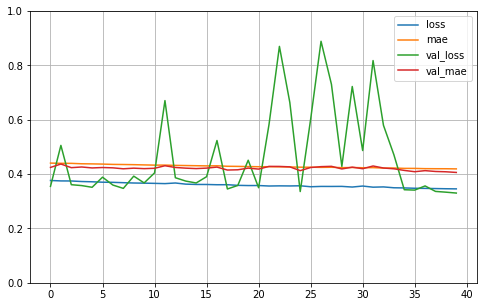

In [60]:
pd.DataFrame(model_history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

This model doesn't perform well

## Saving and Restoring model

In [62]:
model.save("my_first_model.h5") #Save model

In [63]:
del model

In [64]:
keras.backend.clear_session()

In [65]:
model = keras.models.load_model("my_first_model.h5")

In [66]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_2[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_2[0][0]                    
                                                                 dense_1[0][0]                

In [67]:
y_pred = model.predict(x_new)
y_pred

array([[0.7163942],
       [1.571806 ],
       [4.145753 ]], dtype=float32)

## Using callbacks during training 

In [68]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [70]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape = [8]),
    keras.layers.Dense(30, activation = "relu"),
    keras.layers.Dense(1)
])

In [71]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [72]:
model.compile(loss = "mean_squared_error",
             optimizer = keras.optimizers.SGD(lr = 1e-3), metrics = ["mae"])

In [73]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Model-{epoch:02d}.h5")

In [75]:
model.fit(x_train, y_train, epochs = 10, 
          validation_data = (x_valid, y_valid), callbacks = [checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4393 - mae: 0.4746 - val_loss: 0.4110 - val_mae: 0.4570
Epoch 2/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4315 - mae: 0.4698 - val_loss: 0.4266 - val_mae: 0.4603
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4259 - mae: 0.4676 - val_loss: 0.3996 - val_mae: 0.4493
Epoch 4/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4201 - mae: 0.4639 - val_loss: 0.3939 - val_mae: 0.4503
Epoch 5/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4154 - mae: 0.4610 - val_loss: 0.3889 - val_mae: 0.4453
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4111 - mae: 0.4589 - val_loss: 0.3866 - val_mae: 0.4422
Epoch 7/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4074 - mae: 0.4565 - val_loss: 0.3860 - val_mae: 0.4410
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [76]:
del model
keras.backend.clear_session()

In [77]:
model = keras.models.load_model("Model-10.h5")

In [78]:
mse_test = model.evaluate(x_test, y_test)

162/162 [==============================] - 0s 966us/step - loss: 0.3951 - mae: 0.4477


In [79]:
del model
keras.backend.clear_session()

## Best model only

In [83]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape = x_train.shape[1:]),
    keras.layers.Dense(30, activation = "relu"),
    keras.layers.Dense(1)
])

In [89]:
model.compile(loss = "mean_squared_error",
             optimizer = keras.optimizers.SGD(lr = 1e-3),
             metrics = ["mae"])

In [90]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Best_model.h5", save_best_only = True)

In [91]:
history = model.fit(x_train, y_train, epochs = 40, validation_data = (x_valid, y_valid),
                   callbacks = [checkpoint_cb])

Epoch 1/40
363/363 [==============================] - 1s 2ms/step - loss: 3.4726 - mae: 1.4440 - val_loss: 1.4007 - val_mae: 0.7047
Epoch 2/40
363/363 [==============================] - 1s 1ms/step - loss: 0.8430 - mae: 0.6907 - val_loss: 1.3632 - val_mae: 0.6278
Epoch 3/40
363/363 [==============================] - 1s 2ms/step - loss: 0.7195 - mae: 0.6234 - val_loss: 0.8402 - val_mae: 0.5747
Epoch 4/40
363/363 [==============================] - 1s 2ms/step - loss: 0.6417 - mae: 0.5807 - val_loss: 0.5897 - val_mae: 0.5467
Epoch 5/40
363/363 [==============================] - 1s 2ms/step - loss: 0.5714 - mae: 0.5515 - val_loss: 0.5373 - val_mae: 0.5229
Epoch 6/40
363/363 [==============================] - 1s 1ms/step - loss: 0.5392 - mae: 0.5324 - val_loss: 0.5175 - val_mae: 0.5015
Epoch 7/40
363/363 [==============================] - 1s 1ms/step - loss: 0.5216 - mae: 0.5178 - val_loss: 0.4717 - val_mae: 0.4857
Epoch 8/40
363/363 [==============================] - 1s 1ms/step - loss: 0.

In [93]:
model = keras.models.load_model("Best_model.h5")
mse_test = model.evaluate(x_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3650 - mae: 0.4303


In [94]:
del model
keras.backend.clear_session()

## Early stop model

In [95]:
np.random.seed(42)
tf.random.set_seed(42)

In [96]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape = [8]),
    keras.layers.Dense(30, activation = "relu"),
    keras.layers.Dense(1)
])

In [97]:
model.compile(loss = "mean_squared_error",
             optimizer = keras.optimizers.SGD(lr = 1e-3),
             metrics = ["mae"])

In [98]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("early_stop_model.h5", save_best_only = True)

In [101]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, #number of epochs with no improvement after training stopped
                                                 restore_best_weights = True)

In [102]:
history = model.fit(x_train, y_train, epochs = 200, validation_data = (x_valid, y_valid),
                   callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/200
363/363 [==============================] - 1s 2ms/step - loss: 3.3697 - mae: 1.4280 - val_loss: 0.7126 - val_mae: 0.6368
Epoch 2/200
363/363 [==============================] - 1s 1ms/step - loss: 0.6964 - mae: 0.6267 - val_loss: 0.6880 - val_mae: 0.5704
Epoch 3/200
363/363 [==============================] - 1s 2ms/step - loss: 0.6167 - mae: 0.5701 - val_loss: 0.5803 - val_mae: 0.5352
Epoch 4/200
363/363 [==============================] - 1s 1ms/step - loss: 0.5846 - mae: 0.5491 - val_loss: 0.5166 - val_mae: 0.5207
Epoch 5/200
363/363 [==============================] - 1s 2ms/step - loss: 0.5321 - mae: 0.5292 - val_loss: 0.4895 - val_mae: 0.5022
Epoch 6/200
363/363 [==============================] - 1s 2ms/step - loss: 0.5083 - mae: 0.5146 - val_loss: 0.4951 - val_mae: 0.4934
Epoch 7/200
363/363 [==============================] - 1s 2ms/step - loss: 0.5044 - mae: 0.5060 - val_loss: 0.4861 - val_mae: 0.4838
Epoch 8/200
363/363 [==============================] - 1s 1ms/step - 

In [104]:
model = keras.models.load_model("early_stop_model.h5")
mse = model.evaluate(x_test, y_test)

162/162 [==============================] - 0s 936us/step - loss: 0.3343 - mae: 0.4059
